In [173]:
### Save API Token, if needed

%set_env QXToken=db7904a26e50e782a870246662f692fcea1d09ac92184d1a0b2d7e1534d9d1acc4a3d3a8cd461863128b674c7b1186da56341c1cc8c7db12e5a62677294a91b3

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=db7904a26e50e782a870246662f692fcea1d09ac92184d1a0b2d7e1534d9d1acc4a3d3a8cd461863128b674c7b1186da56341c1cc8c7db12e5a62677294a91b3


In [174]:
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [175]:
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

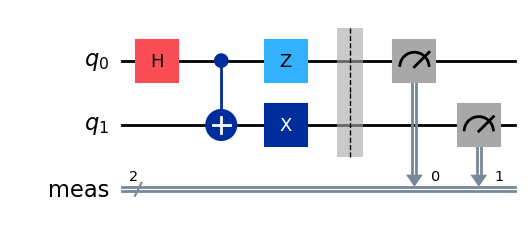

In [176]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

# Step 1: Apply a Hadamard gate to the first qubit
qc.h(0)

# Step 2: Apply a CNOT gate with the first qubit as control and the second qubit as target
qc.cx(0, 1)

# Step 3: Apply an X gate to the second qubit
qc.x(1)

# Step 4: Apply a Z gate to the first qubit
qc.z(0)

# Measure all qubits
qc.measure_all()

# Draw the circuit
qc.draw('mpl')


In [177]:
grade_lab1_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [178]:
qc.measure_all

### Write your code below here ### 

sampler = StatevectorSampler()
pub = [qc]
job_sampler = sampler.run([pub], shots=256)

### Don't change any code past this line ###
result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'10': 126, '01': 130}


In [179]:
grade_lab1_ex2(job_sampler)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


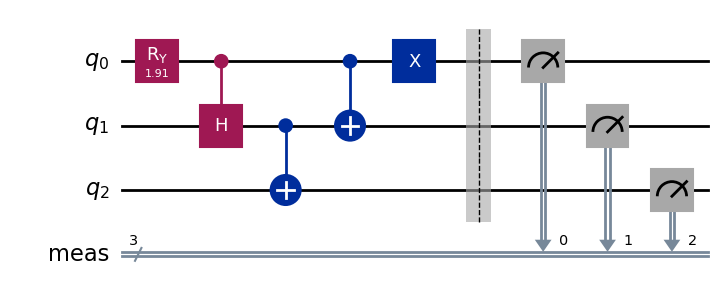

In [180]:
from qiskit import QuantumCircuit

# Step 1: Initialize our 3 qubit circuit
qc = QuantumCircuit(3)

# Step 2: Perform an Ry rotation on qubit 0
qc.ry(1.91063324, 0)

# Step 3: Perform a controlled hadamard gate on qubit 1, with control qubit 0
qc.ch(0, 1)

# Step 4: Add a CNOT gate with control qubit 1 and target qubit 2
qc.cx(1, 2)

# Step 5: Add a CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)

# Step 6: Add an X gate on qubit 0
qc.x(0)

# Don't change any code past this line
qc.measure_all()
qc.draw('mpl')


In [181]:
grade_lab1_ex3(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [182]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'100': 3312, '001': 3294, '010': 3394}


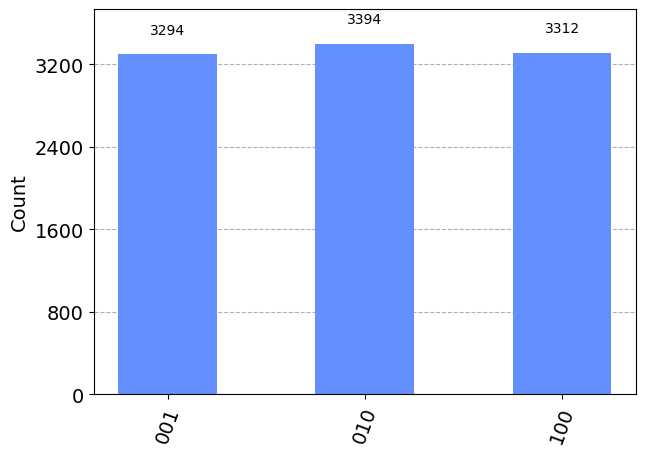

In [183]:
plot_histogram(counts_sampler)

In [184]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


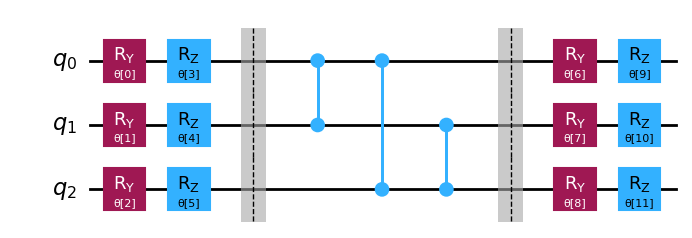

In [185]:
num_qubits = 3
rotation_blocks = ['ry','rz']
entanglement_blocks = 'cz'
entanglement = 'full'

ansatz = TwoLocal(num_qubits=num_qubits,rotation_blocks=rotation_blocks,entanglement_blocks=entanglement_blocks,entanglement=entanglement,reps=1,insert_barriers=True)


### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [186]:
grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [187]:
num_params = ansatz.num_parameters
num_params

12

In [188]:
backend_answer = FakeSherbrooke()
optimization_level_answer = 3
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = transpile(ansatz, backend=backend_answer, optimization_level=optimization_level_answer)


In [189]:
grade_lab1_ex5(isa_circuit) 

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


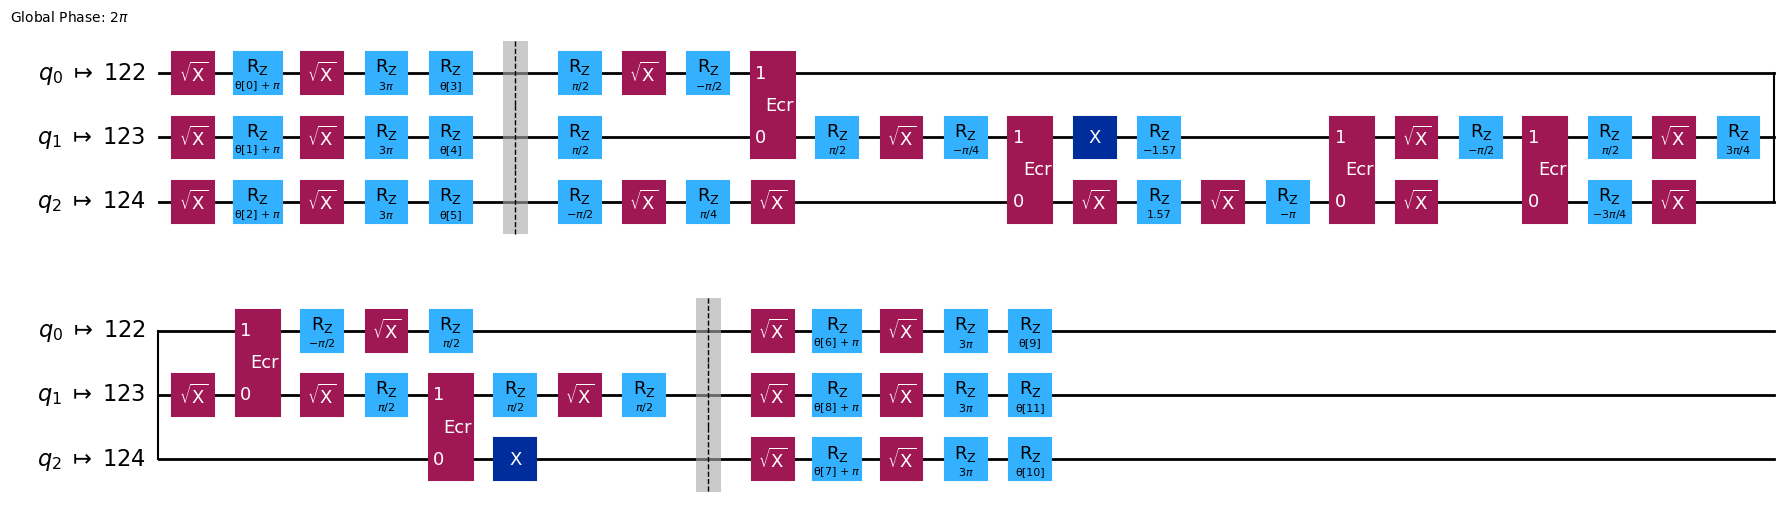

In [190]:
isa_circuit.draw('mpl', idle_wires=False,)

In [191]:
hamiltonian_isa= pauli_op.apply_layout(layout=isa_circuit.layout)

In [192]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [193]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    pub = (ansatz, hamiltonian, params)
    result = estimator.run([pub]).result()
    energy = result[0].data.evs


    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(energy)


### Don't change any code past this line ###
    print(energy)
    return energy, result

In [194]:
grade_lab1_ex6(cost_func) 

[0.67138672]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [195]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([5.14310148, 1.79988961, 3.48135305, 0.921684  , 0.93666679,
       0.22559047, 5.90321671, 3.19548127, 1.66915888, 4.12409773,
       6.27798138, 4.39738836])

In [199]:
### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

backend = FakeSherbrooke()
backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session1:
    estimator = Estimator(session=session1)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 100})

0.6181640625
1.10400390625
1.099609375
0.53662109375
0.5439453125
0.55810546875
0.55908203125
0.52099609375
0.3916015625
0.57958984375
0.3369140625
0.36669921875
0.3115234375
-0.40673828125
-1.38037109375
-1.580078125
-1.10205078125
-1.671875
-0.689453125
-1.53173828125
-1.310546875
-1.544921875
-1.0810546875
-1.416015625
-0.88330078125
-1.7041015625
-1.9052734375
-2.19873046875
-1.990234375
-2.47265625
-2.5205078125
-2.54833984375
-2.39306640625
-2.63916015625
-2.736328125
-2.6982421875
-2.76611328125
-2.7685546875
-2.693359375
-2.7197265625
-2.626953125
-2.61181640625
-2.8740234375
-2.91357421875
-2.8232421875
-2.720703125
-2.79736328125
-2.9580078125
-2.98291015625
-2.92578125
-2.984375
-2.89990234375
-2.9736328125
-2.94091796875
-2.9345703125
-2.93408203125
-2.94091796875
-2.9765625
-2.93359375
-2.986328125
-2.9619140625
-2.9853515625
-2.9775390625
-2.99072265625
-2.98681640625
-2.98486328125
-2.98681640625
-2.98876953125
-2.99462890625
-2.990234375
-2.994140625
-2.98974609375
-2.9

In [200]:
grade_lab1_ex7(res)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
